In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
from collections import Counter


In [2]:
def readCsv(fileName):
    fullFileName = r'C:\Users\Owner\McGill\4thYear\COMP551\Assignments\Assignment2\Datasets\DS' + fileName
    df = pd.read_csv(fullFileName, encoding='utf-8', header = None,
                 comment='#', sep=',')
    
    return df

In [3]:
def vote(neighbors):
    classCounter = Counter()
    for neighbor in neighbors:
        classCounter[neighbor[1]]+=1
        
    return classCounter.most_common(1)[0][0]

In [4]:
def kMM(testRow, dfTrain):
    vectorTrainClass = dfTrain.iloc[:,20].as_matrix()
    matrixTrain = dfTrain.iloc[:,0:20].as_matrix()
    vectorTest = testRow[0:20].as_matrix()
#     print(vectorTest)
    subtractedMatrix = np.subtract(matrixTrain, vectorTest)
    squareMatrix = np.square(subtractedMatrix)
    distances = np.sqrt(np.sum(squareMatrix, axis = 1))
    zipped = list(zip(distances, vectorTrainClass))
    
    return sorted(zipped)
        


In [5]:
def getNNClass(testRow, k, dfTrain):
    listSorted = kMM(testRow, dfTrain)
    classCounter = vote(listSorted[0:k])
    
    return classCounter

In [14]:
def iterateTestData(dfTest, dfTrain, k):
    predictions = list()
    
    for i in range(0, len(dfTest)):
        predictions.append(getNNClass(dfTest.iloc[i,:], k, dfTrain))

    return predictions


In [39]:
def testScores(dataset, k):
    if dataset == 1:
        dfTest = readCsv('1_test.csv')
        dfTrain = readCsv('1_train.csv')
    else:
        dfTest = readCsv('2_test.csv')
        dfTrain = readCsv('2_train.csv')
    
    predictionArray = iterateTestData(dfTest, dfTrain, k)
    
    dfTest = dfTest[20].as_matrix()
#     print(dfTest)
    truePositive,trueNegative, falsePositive, falseNegative = np.zeros(4)
    for i in range(0, len(dfTest)):
        if predictionArray[i]==1:
            if dfTest[i]==1:
                truePositive+=1
            elif dfTest[i]==0:
                falsePositive+=1
        elif predictionArray[i]==0:
            if dfTest[i]==1:
                falseNegative+=1
            elif dfTest[i]==0:
                trueNegative+=1

    precision = truePositive/(truePositive+falsePositive)
    recall = truePositive/(truePositive+falseNegative)
    fMeasure = 2*precision*recall/(precision+recall)

    return (precision, recall, fMeasure)

testScores(2, 20)

(0.54125412541254125, 0.52988691437802904, 0.53551020408163263)

In [37]:
def graphFit(dataset):
    k = np.linspace(1,101, 51)
    fMeasure = list()
    print(k)
    for i in k:
        testScore = testScores(dataset, int(i))
#         print(testScore)
        fMeasure.append(testScore[2])
        
    plt.figure(figsize=(20,8), dpi=80)
    plt.plot(k, fMeasure, '-' )
    plt.xlabel('K-Value')
    plt.ylabel('F-Measure')
    plt.title('Best F-Measure Values')
    plt.show()
    

[   1.    3.    5.    7.    9.   11.   13.   15.   17.   19.   21.   23.
   25.   27.   29.   31.   33.   35.   37.   39.   41.   43.   45.   47.
   49.   51.   53.   55.   57.   59.   61.   63.   65.   67.   69.   71.
   73.   75.   77.   79.   81.   83.   85.   87.   89.   91.   93.   95.
   97.   99.  101.]


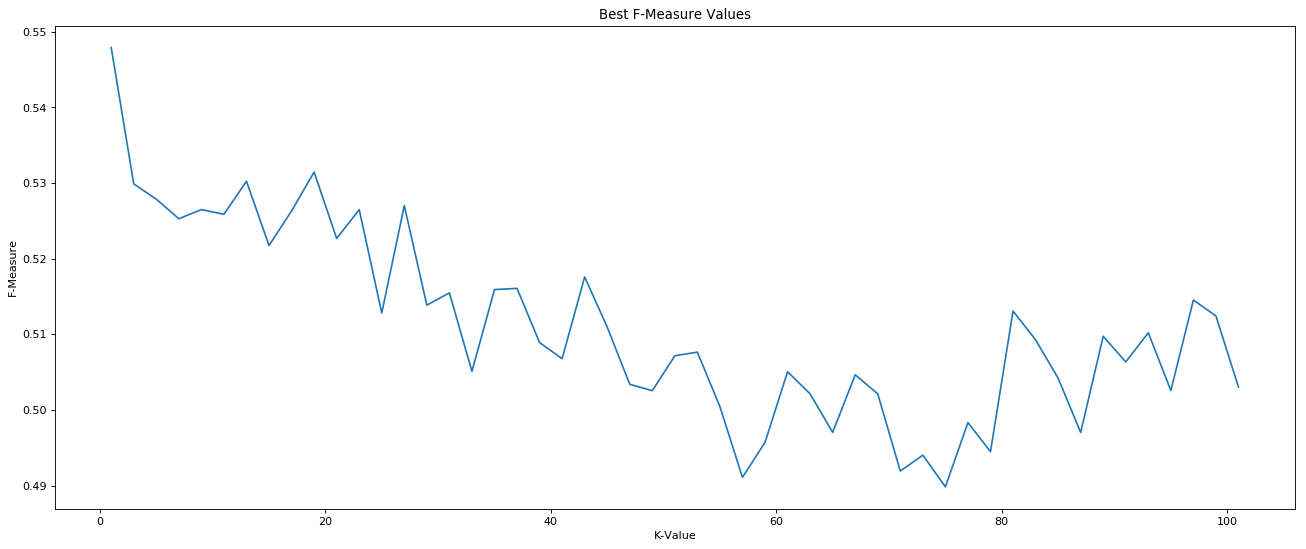

In [38]:
graphFit(2)